In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [3]:
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9512b3895db7f168977f658de988d464


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
#alternative way to create city_url
# Loop through all the cities in our list.
"""for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1"""

'for i in range(len(cities)):\n\n    # Group cities in sets of 50 for logging purposes.\n    if (i % 50 == 0 and i >= 50):\n        set_count += 1\n        record_count = 1\n    # Create endpoint URL with each city.\n    city_url = url + "&q=" + cities[i].replace(" ", "+")\n    \n    # Log the URL, record, and set numbers and the city.\n    print(f"Processing Record {record_count} of Set {set_count} | {city}")\n    \n    # Add 1 to the record count.\n    record_count += 1'

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | buala
Processing Record 4 of Set 1 | kars
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | lamu
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | lieto
Processing Record 19 of Set 1 | atambua
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | naze
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Set 1 | nanortalik
Processing Record 24 of Set 1 | bredasdorp
Processing Record 25 of Set 1 | oksfjor

Processing Record 43 of Set 4 | port keats
Processing Record 44 of Set 4 | bluff
Processing Record 45 of Set 4 | oyama
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | balakhninskiy
Processing Record 48 of Set 4 | medianeira
Processing Record 49 of Set 4 | marsh harbour
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | solok
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | nelson bay
Processing Record 4 of Set 5 | susanville
Processing Record 5 of Set 5 | sunamganj
City not found. Skipping...
Processing Record 6 of Set 5 | garelochhead
Processing Record 7 of Set 5 | esso
Processing Record 8 of Set 5 | padang
Processing Record 9 of Set 5 | marcona
City not found. Skipping...
Processing Record 10 of Set 5 | san pedro
Processing Record 11 of Set 5 | port elizabeth
Processing Record 12 of Set 5 | atar
Processing Record 13 of Set 5 | norman wells
Processing Record 14 of Set 5 | tete
Processing Record 15 of Set 5 

Processing Record 29 of Set 8 | waw
Processing Record 30 of Set 8 | brae
Processing Record 31 of Set 8 | hambantota
Processing Record 32 of Set 8 | bredy
Processing Record 33 of Set 8 | malkerns
Processing Record 34 of Set 8 | aguimes
Processing Record 35 of Set 8 | limulunga
Processing Record 36 of Set 8 | wichita falls
Processing Record 37 of Set 8 | caravelas
Processing Record 38 of Set 8 | halifax
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | teknaf
Processing Record 41 of Set 8 | taganak
Processing Record 42 of Set 8 | baykit
Processing Record 43 of Set 8 | los angeles
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | ikongo
Processing Record 47 of Set 8 | saint-leu
Processing Record 48 of Set 8 | mehamn
Processing Record 49 of Set 8 | kendari
Processing Record 50 of Set 8 | ochakiv
Processing Record 1 of Set 9 | nhulunbuy
Processing Record 2 of Set 9 | phuthaditjhaba
Processi

Processing Record 19 of Set 12 | japura
Processing Record 20 of Set 12 | sinkat
City not found. Skipping...
Processing Record 21 of Set 12 | buzmeyin
Processing Record 22 of Set 12 | merauke
Processing Record 23 of Set 12 | longyearbyen
Processing Record 24 of Set 12 | kholodnyy
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | gat
Processing Record 27 of Set 12 | zhigansk
Processing Record 28 of Set 12 | pacific grove
Processing Record 29 of Set 12 | estelle
Processing Record 30 of Set 12 | son la
Processing Record 31 of Set 12 | williston
Processing Record 32 of Set 12 | buraydah
Processing Record 33 of Set 12 | mosquera
Processing Record 34 of Set 12 | gravdal
Processing Record 35 of Set 12 | tazovskiy
Processing Record 36 of Set 12 | praya
Processing Record 37 of Set 12 | sindor
Processing Record 38 of Set 12 | yankton
Processing Record 39 of Set 12 | sukpak
Processing Record 40 of Set 12 | qasigiannguit
Processing Record 41 of Set 12 | matara
Processing Recor

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [23]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

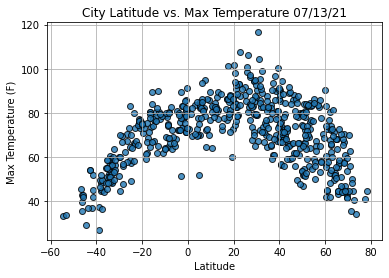

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

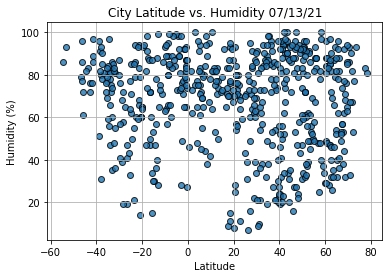

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

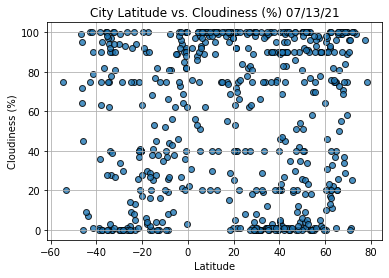

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

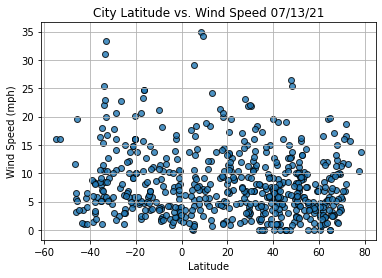

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()